In [93]:
# Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as norm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

In [95]:
# Importing Datasets

# ALLOrdinary
aord = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/ALLOrdinary.csv')
# Nikkei225
nikkei = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/Nikkei225.csv').ffill()
# HSI
hsi = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/HSI.csv')
# DAXI
daxi = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/DAXI.csv')
# CAC40
cac40 = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/CAC40.csv')
# SP500
sp500 = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/SP500.csv')
# DJI
dji = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/DJI.csv')
# Nasdaq Composite
nasdaq = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/nasdaq_composite.csv')
# SPY
spy = pd.read_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/SPY.csv')

In [97]:
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,146.529999,146.990005,143.880005,144.929993,116.593864,204935600
1,2008-01-03,144.910004,145.490005,144.070007,144.860001,116.537567,125133300
2,2008-01-04,143.339996,143.440002,140.910004,141.309998,113.681671,232330900
3,2008-01-07,141.809998,142.229996,140.100006,141.190002,113.585121,234991000
4,2008-01-08,142.080002,142.899994,138.440002,138.910004,111.750923,326365700


In [99]:
# Creating a new DataFrame to store all the modified prices for each share

indicepanel = pd.DataFrame()
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['spy_lag1'] = spy['Open'].shift(1)
indicepanel['sp500'] = sp500['Open'].shift(1) - sp500['Open']
indicepanel['nasdaq'] = nasdaq['Open'].shift(1) - nasdaq['Open']
indicepanel['dji'] = dji['Open'].shift(1) - dji['Open']

indicepanel['daxi'] = daxi['Open'].shift(1) - daxi['Open']
indicepanel['cac40'] = cac40['Open'].shift(1) - cac40['Open']

indicepanel['aord'] = aord['Close'] - aord['Open']
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']


indicepanel['Price'] = spy['Open']

In [101]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,daxi,cac40,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,15.500000,-71.679688,-464.320313,146.529999
1,-1.570008,146.529999,20.419922,41.949951,217.70019,104.450195,71.779785,-50.100097,-162.750000,-48.830078,144.910004
2,-1.529998,144.910004,3.540039,40.879883,-2.43945,27.990235,-5.489746,-2.300293,515.349609,99.370117,143.339996
3,0.270004,143.339996,29.940064,56.930176,245.40918,102.709961,111.689941,-117.399903,216.951171,234.450195,141.809998
4,-2.990006,141.809998,-1.640015,7.179931,-19.75000,-33.680176,-44.509766,-27.500000,-354.060547,-158.209961,142.080002


In [103]:
indicepanel = indicepanel.ffill()
indicepanel.dropna(inplace = True)

In [105]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
daxi        0
cac40       0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [107]:
indicepanel.to_csv('/Users/tejasdhawale/Desktop/Machine Learning/Python for Financial Data Analysis/notebooks/datasets/multiple_LRM_-_DataSets/indicepanel.csv')

In [109]:
indicepanel.shape

(2678, 11)

In [111]:
# Splitting the data into Train and Test (1:1) as there is high level of noise in stock data

Train = indicepanel.iloc[:1000,:]
Test = indicepanel.iloc[1000:2000,:]
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


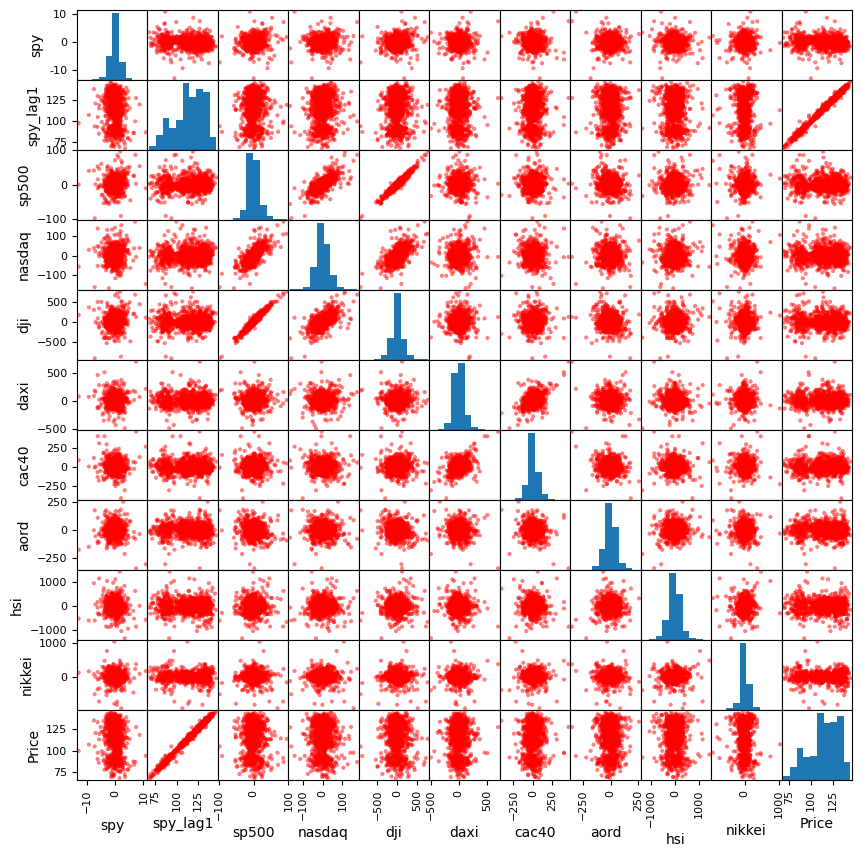

In [113]:
# The scatter plot below shows high level of noise in the stock market

sm = scatter_matrix(Train, figsize = (10,10), color = 'red')

In [121]:
Train.iloc[:,:-1].corr()['spy']

spy         1.000000
spy_lag1   -0.061115
sp500       0.106037
nasdaq      0.031459
dji         0.099898
daxi        0.001215
cac40      -0.024161
aord        0.010926
hsi        -0.070197
nikkei      0.047893
Name: spy, dtype: float64

In [127]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+daxi+aord+hsi+nikkei'
lm = smf.ols(formula = formula, data = Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.875
Date:                Sat, 02 Aug 2025   Prob (F-statistic):           7.61e-05
Time:                        20:50:29   Log-Likelihood:                -2019.0
No. Observations:                1000   AIC:                             4058.
Df Residuals:                     990   BIC:                             4107.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7564      0.393      1.922      0.055      -0.016       1.529
spy_lag1      -0.0069      0.003     -2.023      0.043      -0.014      -0.000
sp500          0.0528      0.018      2.923      0.004       0.017       0.088
nasdaq        -0.0081      0.003     -2.882      0.004      -0.014      -0.003
dji           -0.0033      0.002     -1.900      0.058      -0.007       0.000
cac40         -0.0009      0.001     -0.953      0.341      -0.003       0.001
daxi           0.0003      0.001      0.516      0.606      -0.001       0.002
aord           0.0011      0.001      1.009      0.313      -0.001       0.003
hsi           -0.0006      0.000     -2.614      0.009      -0.001      -0.000
nikkei         0.0008      0.000      1.920      0.055   -1.75e-05       0.002
==============================================================================
Omnibus:                      171.049   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1448.688
Skew:                          -0.513   Prob(JB):                         0.00
Kurtosis:                       8.807   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
Train.loc[:, 'PredictedY'] = lm.predict(Train)
Test.loc[:, 'PredictedY'] = lm.predict(Test)

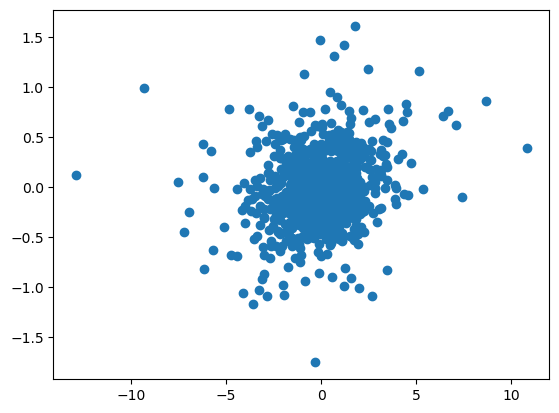

In [133]:
plt.scatter(Train['spy'], Train['PredictedY'])

In [135]:
def adjustedMetric(data, model, model_k, yname):
    # Predict values
    data['yhat'] = model.predict(data)

    # Total Sum of Squares
    SST = ((data[yname] - data[yname].mean()) ** 2).sum()

    # Regression Sum of Squares
    SSR = ((data['yhat'] - data[yname].mean()) ** 2).sum()

    # Error Sum of Squares
    SSE = ((data[yname] - data['yhat']) ** 2).sum()

    # R-squared
    r2 = SSR / SST

    # Adjusted R-squared
    n = data.shape[0]  # number of samples
    adjustR2 = 1 - (1 - r2) * (n - 1) / (n - model_k - 1)

    # RMSE
    RMSE = (SSE / (n - model_k - 1)) ** 0.5

    return adjustR2, RMSE



In [137]:
print("Adjusted R2 and RMSE on Train:", adjustedMetric(Train, lm, 9, 'spy'))
print("Adjusted R2 and RMSE on Test:", adjustedMetric(Test, lm, 9, 'spy'))

Adjusted R2 and RMSE on Train: (0.025247841989421427, 1.8314630313371578)
Adjusted R2 and RMSE on Test: (0.21436057024960464, 1.5156351036988807)


/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/3022477341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)
/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/3022477341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)


In [139]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)

    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]

    return assessment

In [141]:
assessTable (Test, Train, lm, 9, 'spy')

/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/3022477341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)
/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/3022477341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)


,Train,Test
R2,0.025248,0.214361
RMSE,1.831463,1.515635


In [143]:
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy']*Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print(Train['Profit'].sum())

200.60989999999987


/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/1294949124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/1294949124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Profit'] = Train['spy']*Train['Order']
/var/folders/bd/k4r_2jfn1xv_qgv248wpd5140000gn/T/ipykernel_60956/1294949124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [147]:
Train.tail()

,spy,spy_lag1,sp500,nasdaq,dji,daxi,cac40,aord,hsi,nikkei,Price,PredictedY,yhat,Order,Profit,Wealth
996,-2.300003,124.949997,18.220093,-12.349854,162.41992,-143.890136,8.179932,29.799804,-191.798828,11.540040,124.860001,0.517513,0.517513,1,-2.300003,201.829894
997,0.470001,124.860001,11.099976,63.459961,68.94043,-148.490235,56.469971,-43.899903,277.361328,-17.240234,122.559998,-0.579363,-0.579363,-1,-0.470001,201.359893
998,-0.799996,122.559998,13.609985,0.280029,124.42969,-15.529785,85.030029,6.000000,56.160156,-10.790039,123.029999,0.103541,0.103541,1,-0.799996,200.559897
999,-0.170005,123.029999,-3.969971,11.309815,-44.95996,-339.270019,-9.209961,-41.900390,80.039062,13.359375,122.230003,-0.426789,-0.426789,-1,0.170005,200.729902
1000,0.120002,122.230003,-3.650024,-9.449951,3.70996,-37.250000,26.649902,18.699707,-17.378907,43.709961,122.059998,-0.182320,-0.182320,-1,-0.120002,200.609900


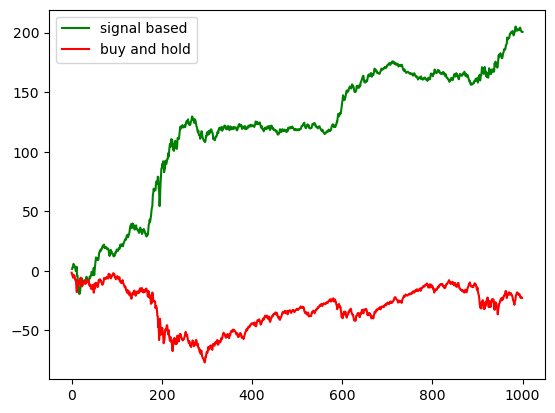

In [187]:
plt.plot(Train['Wealth'], color = 'green', label = "signal based")
plt.plot(Train['spy'].cumsum().values, color = 'red', label = "buy and hold")
plt.legend()